In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv(r'C:\Users\user\Desktop\workspace\ML practice\Datasets\Iris.csv')

In [9]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder

In [7]:
encoder=LabelEncoder()
df['variety']=encoder.fit_transform(df[['variety']])

C:\Users\user\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
df['variety'].value_counts()

0    50
1    50
2    50
Name: variety, dtype: int64

In [15]:
import seaborn as sns

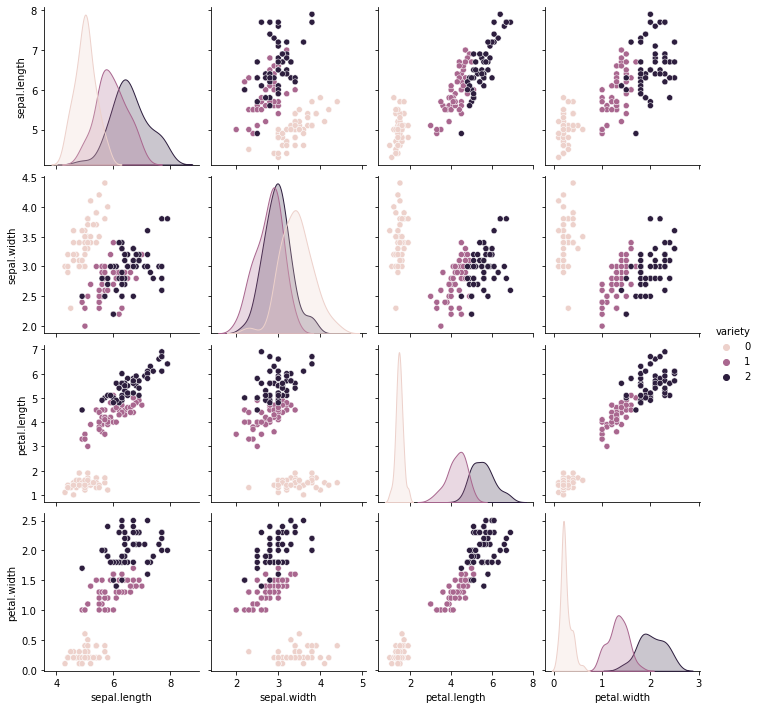

In [16]:
sns.pairplot(df,hue='variety')

In [68]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [69]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
x_train_scaled=scaler.fit_transform(x_tra)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [23]:
clf1=LogisticRegression()
clf2=KNeighborsClassifier(n_neighbors=7)
clf3=RandomForestClassifier(n_estimators=50,max_depth=5,min_samples_split=35,min_impurity_decrease=0.02)

In [70]:
clf1.fit(x_scaled,y)
clf2.fit(x,y)
clf3.fit(x,y)

RandomForestClassifier(max_depth=5, min_impurity_decrease=0.02,
                       min_samples_split=35, n_estimators=50)

In [71]:
estimators=[('lr',clf1),('knn',clf2),('rf',clf3)]

In [72]:
from sklearn.ensemble import VotingClassifier
vc=VotingClassifier(estimators=estimators,voting='hard')


In [77]:
for estimator in estimators:
    score_list=[]
    if estimator=='lr':
        score=cross_val_score(estimator[1],x_scaled,y,scoring=='accuracy',cv=10)
        print("lr",np.round(np.mean(score),2))
        score_list.append(np.round(np.mean(score),2))
    score=cross_val_score(estimator[1],x,y,scoring='accuracy',cv=10)
    print(estimator,np.round(np.mean(score),2))
    score_list.append(np.round(np.mean(score),2))
    
    print("accuracy:",np.mean(score_list))

('lr', LogisticRegression()) 0.97
accuracy: 0.97
('knn', KNeighborsClassifier(n_neighbors=7)) 0.97
accuracy: 0.97
('rf', RandomForestClassifier(max_depth=5, min_impurity_decrease=0.02,
                       min_samples_split=35, n_estimators=50)) 0.95
accuracy: 0.95


In [36]:
vc1=VotingClassifier(estimators=estimators,voting='soft')
score=cross_val_score(vc1,x,y,cv=10,scoring='accuracy')
print(np.round(np.mean(score),2))

0.96


In [46]:
import warnings
warnings.filterwarnings("ignore")

In [47]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            vc=VotingClassifier(estimators=estimators,voting='soft',weights=[i,j,k])
            score=cross_val_score(vc,x,y,cv=10,scoring='accuracy')
            print("for i={},j={},k={}".format(i,j,k),np.round(np.mean(score),2))

for i=1,j=1,k=1 0.97
for i=1,j=1,k=2 0.96
for i=1,j=1,k=3 0.97
for i=1,j=2,k=1 0.97
for i=1,j=2,k=2 0.97
for i=1,j=2,k=3 0.97
for i=1,j=3,k=1 0.97
for i=1,j=3,k=2 0.97
for i=1,j=3,k=3 0.97
for i=2,j=1,k=1 0.97
for i=2,j=1,k=2 0.97
for i=2,j=1,k=3 0.97
for i=2,j=2,k=1 0.97
for i=2,j=2,k=2 0.97
for i=2,j=2,k=3 0.96
for i=2,j=3,k=1 0.97
for i=2,j=3,k=2 0.97
for i=2,j=3,k=3 0.97
for i=3,j=1,k=1 0.97
for i=3,j=1,k=2 0.96
for i=3,j=1,k=3 0.97
for i=3,j=2,k=1 0.97
for i=3,j=2,k=2 0.97
for i=3,j=2,k=3 0.97
for i=3,j=3,k=1 0.97
for i=3,j=3,k=2 0.97
for i=3,j=3,k=3 0.97


In [48]:
from sklearn.svm import SVC

In [58]:
from sklearn.datasets import make_classification
x,y=make_classification(n_samples=1000,n_features=20,n_informative=15,n_redundant=5,random_state=21)

In [59]:
svm3=SVC(probability=True,kernel='poly',degree=3)
svm4=SVC(probability=True,kernel='poly',degree=4)
svm5=SVC(probability=True,kernel='poly',degree=5)

In [61]:
vc2=VotingClassifier(estimators=estimators,voting='hard')
score=cross_val_score(vc1,x,y,cv=10,scoring='accuracy')
print(np.round(np.mean(score),2))

0.88


In [ ]:
 n 